In [19]:
import os
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import *
from keras.layers.pooling import *
from keras.models import load_model
from KerasModelingTools import *
model_path = os.path.expanduser('~') + '\Documents\RULE\pyFiles\KerasModels\\'

In [20]:
model = load_model(model_path+'period_placer.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 2, 3, 1, 16)       4816      
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1164      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 5,993
Trainable params: 5,993
Non-trainable params: 0
_________________________________________________________________


In [21]:
texts = upload_texts(os.path.expanduser('~')+'\\Documents\\RULE\\TargetData\\Processed\\Full\\')
data = convert_texts(texts, 3, False)

In [22]:
xy = []
for i in range(len(data)):
    x, y = reshape_keras_data(data[i][2]), data[i][1]
    if len(x) == len(y):
        xy.append((x,y))

#### Confusion Matrix Analysis. 
We compute metrics from the confusion matrix to evaluate the model performance on the first 6 of 192 student recalls. The outputs suggest that the period placer almost always predicts the full stops. The fifth recall misses 2 of the full stops, resulting in a lower recall.

{'accuracy': 0.9880952380952381,
 'f1': 0.888888888888889,
 'precision': 1.0,
 'recall': 0.8}

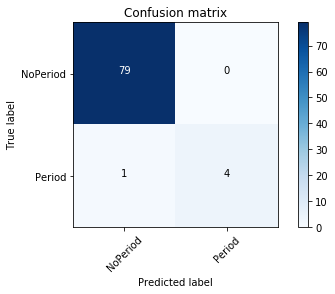

In [23]:
summarize_periods_model(xy[0][1], model.predict_classes(xy[0][0]))

{'accuracy': 0.9915966386554622,
 'f1': 0.888888888888889,
 'precision': 1.0,
 'recall': 0.8}

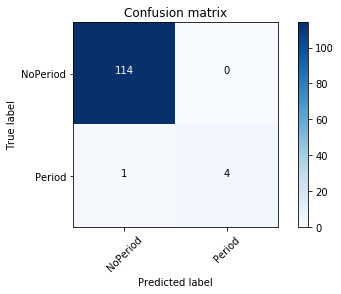

In [24]:
summarize_periods_model(xy[1][1], model.predict_classes(xy[1][0]))

{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

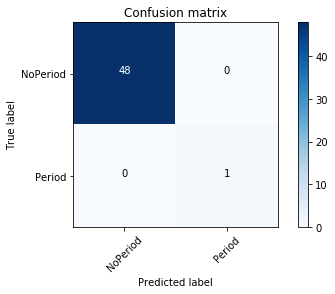

In [25]:
summarize_periods_model(xy[2][1], model.predict_classes(xy[2][0]))

{'accuracy': 0.9830508474576272,
 'f1': 0.8,
 'precision': 1.0,
 'recall': 0.6666666666666666}

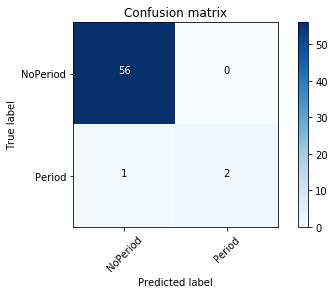

In [26]:
summarize_periods_model(xy[3][1], model.predict_classes(xy[3][0]))

{'accuracy': 0.9787234042553191,
 'f1': 0.7499999999999999,
 'precision': 1.0,
 'recall': 0.6}

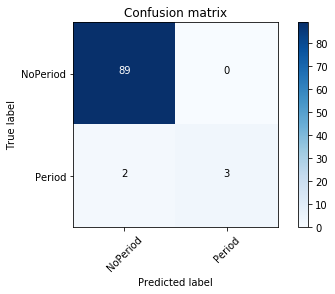

In [27]:
summarize_periods_model(xy[4][1], model.predict_classes(xy[4][0]))

{'accuracy': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

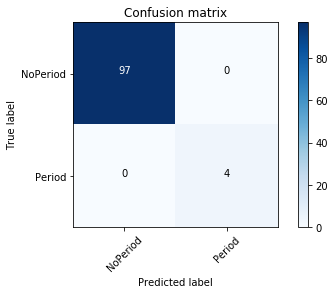

In [40]:
summarize_periods_model(xy[5][1], model.predict_classes(xy[5][0]))

#### AUROC analysis.
We compute the Area Under the Receiver Operating Characteristic Curve for each essay.

In [11]:
from sklearn.metrics import roc_auc_score

In [29]:
l = []
r = []
for i in range(len(xy)):
    try:
        r.append(roc_auc_score(xy[i][1], model.predict(xy[i][0])))
    except ValueError:
        l.append(i)

We get very good AUROC scores for the 192 recalls.

In [30]:
print(r)

[1.0, 1.0, 1.0, 1.0, 0.9932584269662922, 1.0, 1.0, 1.0, 0.9980569948186528, 0.9957599778781454, 1.0, 1.0, 1.0, 0.999647266313933, 1.0, 1.0, 1.0, 1.0, 0.9564285714285715, 0.9973418394471026, 1.0, 1.0, 0.9921875, 0.9988545246277205, 0.9978213507625272, 0.9097345132743363, 1.0, 1.0, 1.0, 0.9807692307692308, 1.0, 0.9954246496997426, 0.9758706467661692, 0.9997825614263971, 1.0, 0.9909796139274761, 1.0, 0.9988776655443322, 1.0, 1.0, 1.0, 0.9234271523178809, 0.9963369963369964, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.884297520661157, 1.0, 0.9832602630530092, 0.9943502824858756, 1.0, 1.0, 1.0, 1.0, 0.9945175438596491, 1.0, 0.9856060606060606, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9787581699346405, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.995625, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9954887218045113, 1.0, 1.0, 1.0, 1.0, 0.9900471451021478, 0.9655381944444444, 0.9991513737138008, 0.9979182849153332, 0.9999534970238095, 1.0, 0.9882254497639112, 1.0, 1.0, 0.9936708860759493, 0.9995929995929996, 0.991

Predicting these full stops in these two essays throws a ValueError.

In [31]:
print(l)

[133, 134]


#### Place the periods.
We use the predictive model to place periods in the recalls. This custom function will provide an improved product to clinicians in education.

Model missed 1 periods.

In [32]:
print('ACTUAL TRANSCRIPTION')
print(texts[0])

print('\n')

print('WITH PERIOD PLACER')
print(write_periods(texts[0], xy[0][0], model, 3))

ACTUAL TRANSCRIPTION
OK so this chapter focused on um science and pure science and applied science . Um pure science is just finding out things for the greater knowledge and applied science is for a specific task in trying to figure something out . Um the chapter also discussed um the defintion of life . And the different aspects which fall into that category . So things like um homeostasis and other characteristics that help define life in it different categories . Um article talked about DNA and what else was the chapter about ? Mmm yeah . 


WITH PERIOD PLACER
 OK so this chapter focused on um science and pure science and applied science. Um pure science is just finding out things for the greater knowledge and applied science is for a specific task in trying to figure something out Um the chapter also discussed um the defintion of life. And the different aspects which fall into that category. So things like um homeostasis and other characteristics that help define life in it differe

Model missed 2 periods.

In [33]:
print('ACTUAL TRANSCRIPTION')
print(texts[4])

print('\n')

print('WITH PERIOD PLACER')
print(write_periods(texts[4], xy[4][0], model, 3))

ACTUAL TRANSCRIPTION
Uh what I read about was how social interactions can affect uh people behavior . Um and um there lots of vocab words . Um social social norms um cultures and stuff like that is all stuff that can affect um people behavior . Um cultures um or cults can have a really big influence on people decision making . Um and um there um emotions and behavior which are different because emotion is short um more specific stimulus that elicits the arousal of behavior . Um and then um reciprocal um altruism which is getting something back for doing something good in society . 


WITH PERIOD PLACER
 Uh what I read about was how social interactions can affect uh people behavior. Um and um there lots of vocab words Um social social norms um cultures and stuff like that is all stuff that can affect um people behavior. Um cultures um or cults can have a really big influence on people decision making Um and um there um emotions and behavior which are different because emotion is short u

Model missed 2 periods.

In [34]:
print('ACTUAL TRANSCRIPTION')
print(texts[9])

print('\n')

print('WITH PERIOD PLACER')
print(write_periods(texts[9], xy[9][0], model, 3))

ACTUAL TRANSCRIPTION
This reading was uh from a basic chapter of biology and it talked about the different um aspects we use to describe living things and um just kind of how that works as far as their like adaptations how they reproduce and um homeostasis and just those kind of um factors that enable an organism to um to function and live . And it also talked about the three different domains of life bacteria archea and eukarya . And how eukaryotic organisms or cells have a are more complex and they have membrane bound organelles which basically do um they're basically the processing system of the cell . And then they have you have bacteria which are single celled organisms that aren't as complex and there are also viruses which don't even have um the machinery they need to reproduce and um metabolize so they have to infect a host cell . And they also had archea which I believe are bacteria that live in extreme environments such as you know burning hot I don't even know what you'd cal

{'accuracy': 0.9966101694915255,
 'f1': 0.9444444444444444,
 'precision': 1.0,
 'recall': 0.8947368421052632}

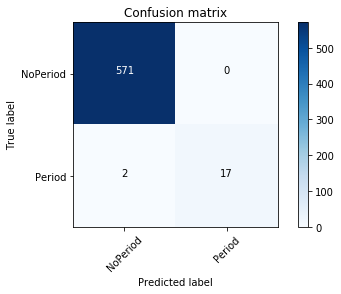

In [35]:
summarize_periods_model(xy[9][1], model.predict_classes(xy[9][0]))

#### Summary
The results available in this notebook highlight the success of a neural approach to predicting full stops. Notably, the model was trained on 64 academic essays and the network topology only involves one convolutional layer and one dense layer. Despite this simplicity, it predicts full stops well in informal verbal recalls.